<a href="https://colab.research.google.com/github/welricsson/portfolio/blob/master/An%C3%A1lise_de_dados_do_Airbnb_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 2.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Rio de Janeiro*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**, além de ser um negógio totalmente disruptivo pois ele **não possui nenhum hotel**!

<center><img alt="Rio de Janeiro" width="100%" src="https://i.pinimg.com/originals/bd/d8/ec/bdd8ece31bb48c9c389a3fcf3648b511.jpg"></center>

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

A análise que será realizada será referente aos dados da cidade do Rio de Janeiro. Veremos quais insights podem ser extraídos a partir dos dados brutos. O foco da análise será na qualidade dos dados e na validação da hipótese do impacto da pandemia nos preços dos imóveis.

 # Sumário <a name="sumario"></a>
1. [Introdução](#introduction)
2. [Coleta dos dados](#paragraph1)
3. [Análise dos dados](#paragraph2)
    1. [Quantas variáveis e quantos registros o nosso conjunto de dados possui?](#subparagraph4)
    2. [Qual a porcentagem de valores ausentes no *dataset*?](#subparagraph5)
    3. [Há *outliers* presentes?](#subparagraph7)
    4. [Qual a correlação existente entre as variáveis?](#subparagraph8)
    5. [Qual o tipo de imóvel mais alugado no Airbnb?](#subparagraph9)
    6. [Qual a localidade mais cara do dataset?](#subparagraph10)
    7. [Houve impacto nos preços dos imóveis devido a pandemia?](#subparagraph11)
4. [Conclusão](#paragraph3)

## Introdução <a name="introduction"></a>

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

## Coleta dos Dados <a name="paragraph1"></a>


In [ ]:
# importa os pacotes necessários
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

%matplotlib inline

In [ ]:
# importa o arquivo referente ao mês de maio para um DataFrame
df = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv")

## Análise dos Dados <a name="paragraph2"></a>

Nesta etapa vamos entender como os dados estão estruturados e identificar os padrões que compoem o *dataset*. Precisamos também fazer algumas validações básicas como: verificar se há duplicidade de registros, a consistência dos dados e avaliar o tipo de distribuição das variáveis.

**Dicionário das variáveis**

Antes de iniciarmos qualquer análise, vamos verificar o dicionário de variáveis e as 5 primeiras entradas do dataframe para termos um panorâma geral.

---

|Variável        |Tipo                      	 |Descrição                         |
|----------------|-------------------------------|-----------------------------|
|`id` 			       			  |int64  |Número de id gerado para identificar o imóvel		  |
|`name` 			   			  |object |Nome da propriedade anunciada                       	  |
|`host_id` 			   			  |int64  |Número de id do proprietário (anfitrião) da propriedade|
|`host_name` 		   			  |object |Nome do anfitrião                                      |
|`neighbourhood_group` 			  |float64|Esta coluna não contém nenhum valor válido             |
|`neighbourhood` 	   			  |object |Nome do bairro                                      	  |
|`latitude` 		   			  |float64|Coordenada da latitude da propriedade                  |
|`longitude` 		   			  |float64|Coordenada da longitude da propriedade                 |
|`room_type` 		   			  |object |Informa o tipo de quarto que é oferecido               |
|`price` 			   			  |int64  |Preço para alugar o imóvel                             |
|`minimum_nights` 	   			  |int64  |Quantidade mínima de noites para reservar              |
|`number_of_reviews`   			  |int64  |Número de reviews que a propriedade possui             |
|`last_review` 		   			  |object |Data do último review                                  |
|`reviews_per_month`   			  |float64|Quantidade de reviews por mês                          |
|`calculated_host_listings_count` |int64  |Quantidade de imóveis do mesmo anfitrião               |
|`availability_365`    			  |int64  |Número de dias de disponibilidade dentro de 365 dias   |

> Os dados do dicionário, com exceção da descrição, foram obtidos a partir do comando `display(df.dtypes)`.


In [ ]:
# verificando as dimensões
print('Dimensões do Dataset',
    '\nVariáveis:   ',df.shape[1], "\n"
      'Entradas: ', df.shape[0])

# verificando as 5 primeiras entradas
df.head()

Dimensões do Dataset 
Variáveis:    16 
Entradas:  35793


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,17878,"Very Nice 2Br in Copacabana w. balcony, fast WiFi",68997,Matthias,NaN,Copacabana,-22.96592,-43.17896,Entire home/apt,188,7,251,2020-04-06,2.09,1,335
1,21280,Renovated Modern Apt. Near Beach,81163,Jules,NaN,Ipanema,-22.98467,-43.19611,Entire home/apt,442,5,94,2020-03-22,1.23,1,90
2,25026,Beautiful Modern Decorated Studio in Copa,102840,Viviane,NaN,Copacabana,-22.97712,-43.19045,Entire home/apt,160,7,238,2020-02-15,1.96,3,129
3,31560,NICE & COZY 1BDR - IPANEMA BEACH,135635,Renata,NaN,Ipanema,-22.98302,-43.21427,Entire home/apt,359,2,282,2020-03-02,2.35,1,0
4,35636,Cosy flat close to Ipanema beach,153232,Patricia,NaN,Ipanema,-22.98816,-43.19359,Entire home/apt,495,2,181,2020-03-15,2.25,1,357


### **1. Quantas variáveis e quantos registros o nosso conjunto de dados possui?** <a name="subparagraph4"></a>  ([&uArr;](#sumario))

Vamos identificar a quantidade de entradas que nosso conjunto de dados possui.

Este *dataset* que baixamos é a versão "resumida" do Airbnb. Na mesma página que baixamos o arquivo `listings.csv` há uma versão mais completa (com um volume maior e com mais variáveis) `listings.csv.gz`.

In [ ]:
# identificar os seguintes pontos: volume de dados, quantidade de variáveis, quantidade distinta de imóveis, se há duplicidade de registros e se há duplicidade nos campos chave;
print("Entradas:\t {}".format(df.shape[0]))
print("Variáveis:\t {}\n".format(df.shape[1]))
print("Quantidade distinta de imóveis:\t {}".format(len(df['id'].unique().tolist())))
print("Registros duplicados:\t\t {}".format(df.duplicated().sum()))
print("Campos chave duplicados:\t {}".format(df[['id','host_id']].duplicated().sum()))

Entradas:	 35793
Variáveis:	 16

Quantidade distinta de imóveis:	 35793
Registros duplicados:		 0
Campos chave duplicados:	 0


In [ ]:
#Verifica a consistência do campo 'calculated_host_listings_count' pela quantidade de 'host_id'
df_filtro = df[df['host_id'] == 102840]
df_filtro[['host_id','calculated_host_listings_count']]

,host_id,calculated_host_listings_count
2,102840,3
435,102840,3
1472,102840,3


Peguei um `host_id` que possui três hotéis. Podemos ver que a quantidade bate com o valor informado no campo `calculated_host_listings_count`.

In [ ]:
print("Quantidade máxima de calculated_host_listings_count:\t {}".format(df_filtro[['host_id','calculated_host_listings_count']].groupby('host_id').max().sum()[0]))
print("Quantidade de host_id:\t {}".format(len(df_filtro.host_id.tolist())))

Quantidade máxima de calculated_host_listings_count:	 3
Quantidade de host_id:	 3


Agora vamos validar a tabela inteira.

In [ ]:
#Verifica a consistência do campo 'calculated_host_listings_count'
print("Quantidade máxima de calculated_host_listings_count: {}".format(df[['host_id','calculated_host_listings_count']].groupby('host_id').max().sum()[0]))
print("Quantidade de host_id:\t {}".format(len(df.host_id.tolist())))


Quantidade máxima de calculated_host_listings_count: 35793
Quantidade de host_id:	 35793


*As* quantidades estão batendo, logo os dados informados pelo campo `calculated_host_listings_count` estão consistentes.

In [ ]:
# transformando as colunas
df[['price','latitude', 'longitude']] = df[['price','latitude', 'longitude']].astype('object')

# verificando o resultado
df.dtypes

id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                           object
longitude                          object
room_type                          object
price                              object
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **2. Qual a porcentagem de valores ausentes no *dataset*?** <a name="subparagraph5"></a>   ([&uArr;](#sumario))

A qualidade de um dataset está diretamente relacionada à quantidade de valores ausentes. É importante entender logo no início se esses valores nulos são significativos comparados ao total de entradas.

In [ ]:
# verificando dados ausentes
(df.isnull().sum()).sort_values(ascending=False)

neighbourhood_group               35793
reviews_per_month                 14906
last_review                       14906
name                                 58
host_name                             5
availability_365                      0
calculated_host_listings_count        0
number_of_reviews                     0
minimum_nights                        0
price                                 0
room_type                             0
longitude                             0
latitude                              0
neighbourhood                         0
host_id                               0
id                                    0
dtype: int64

 Seguindo o que falamos anteriormente, colunas com baixo poder preditivo e grande quantidade de dados faltantes podem ser excluídas.

Em relação às outras entradas, estão em poucas entradas, não parecem ter algum tipo de relação entre elas, e não parecem ter grande poder preditivo. Mais uma vez, vamos fazer a exclusão. Porém, aqui vamos excluir as entradas.

In [ ]:
# excluindo colunas com dados faltantes
df.drop(columns=['reviews_per_month', 'last_review', 'neighbourhood_group'], inplace=True)

# excluindo entradas com dados faltantes
df.dropna(axis=0, inplace=True)

# convertendo os tipos de dados
df[['price','latitude', 'longitude']] = df[['price','latitude', 'longitude']].astype('float')

Feita a limpeza, é hora de conferir os resultados.

In [ ]:
# verificando o resultado
(df.isnull().sum()).sort_values(ascending=False)

availability_365                  0
calculated_host_listings_count    0
number_of_reviews                 0
minimum_nights                    0
price                             0
room_type                         0
longitude                         0
latitude                          0
neighbourhood                     0
host_name                         0
host_id                           0
name                              0
id                                0
dtype: int64

### **3. Há *outliers* presentes?** <a name="subparagraph7"></a>   ([&uArr;](#sumario))
Vamos dar uma olhada nos nossos dados e ver o que identificamos.

In [ ]:
# verificando a distribuição estatística
df[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,35730.0,35730.0,35730.0,35730.0,35730.0
mean,792.3,4.8,9.8,8.2,171.9
std,2435.6,21.9,25.8,34.9,154.6
min,0.0,1.0,0.0,1.0,0.0
25%,159.0,1.0,0.0,1.0,0.0
50%,299.0,2.0,1.0,1.0,160.0
75%,649.0,4.0,6.0,3.0,362.0
max,138288.0,1123.0,401.0,324.0,365.0


Aqui, algumas coisas já chamam a nossa atenção, como por exemplo:

* A variável `price` tem o mínimo em 0.
* Lembrando que a variável `price` trata do preço da diária dos imóveis em moeda local (USD), estamos vendo que o *Terceiro Quartil (**75%**)* está em **649** dólares, mas o máximo está em **138.288** dórales. Claramente, há outliers por aqui.
* A variável `minimum_nights` tem como seu *máximo o valor* **1.123**, sendo que o *Terceiro Quartil está em **4** . Claramente temos outliers nessa variável.
* As variáveis `number_of_reviews`, `calculated_host_listings_count` e `availability_365` também podem conter outliers, mas não vamos nos preocupar com elas agora.

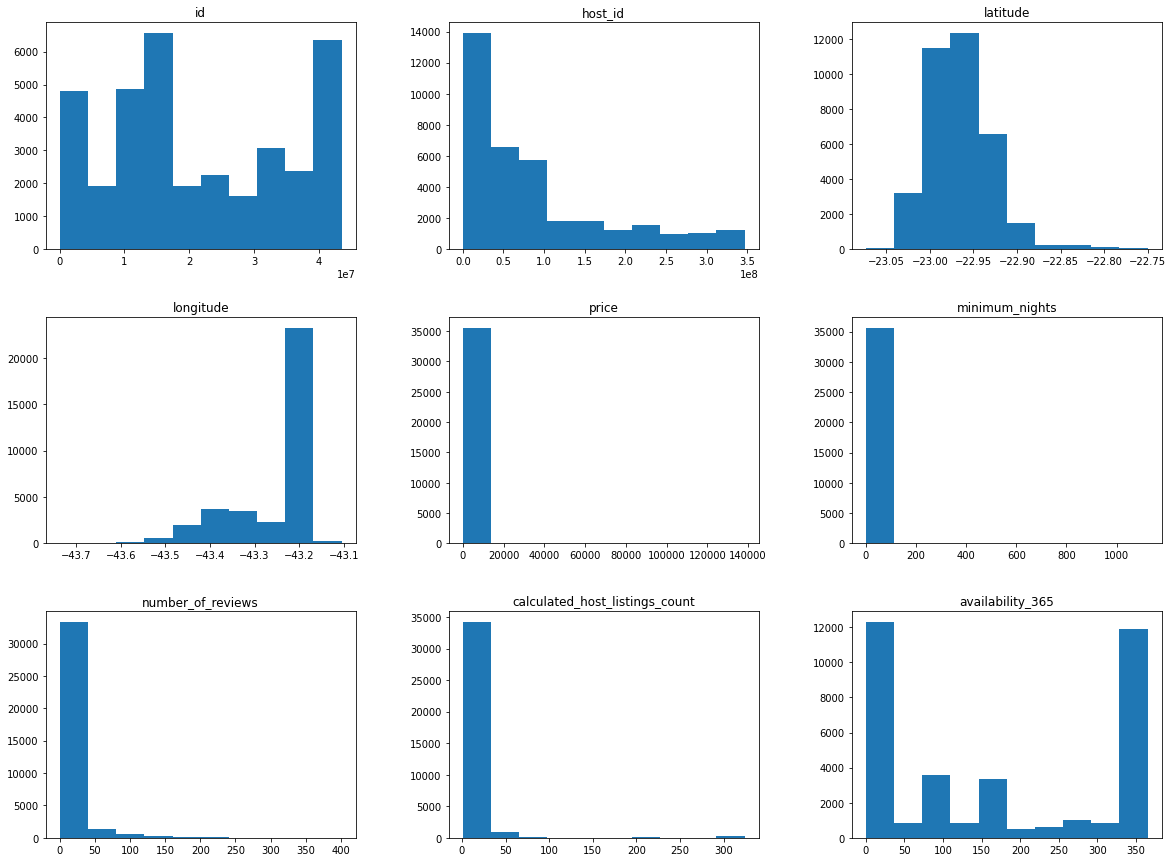

In [ ]:
# verificando as distribuições
df.hist(figsize=(20,15), grid=False);

Verificando os histogramas, conseguimos ver claramente que temos outliers presentes.

#### Limpando Outliers

Para tratar dos outliers desse conjunto de dados, iremos calcular os limites utilizando a regra do IQR Score.

Primeiramente, vamos lembrar o que é o IQR.

O IQR é calculado subtraindo o Terceiro Quartil (75%) pelo Primeiro Quartil (25%).

# IQR = Q3 - Q1

Vamos seguir os seguintes passos:

* Definir o Q1 e Q3 para as variáveis que serão limpas.
* Calcular o IQR para as variáveis.
* Definir o limite superior e inferior para cortar os outliers.
* Remover os outliers.

In [ ]:
# identificando os outliers para a variável price
q1_price = df.price.quantile(.25)
q3_price = df.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  490.0
Limite superior de price:  1384.0
Limite inferior de price:  -576.0


Aqui podemos ver que, apesar de não termos outliers na parte inferior, continuamos tendo valores iguais a zero, que precisam ser tratados.

Vamos plotar um boxplot para visualizarmos a diferença feita pela limpeza.

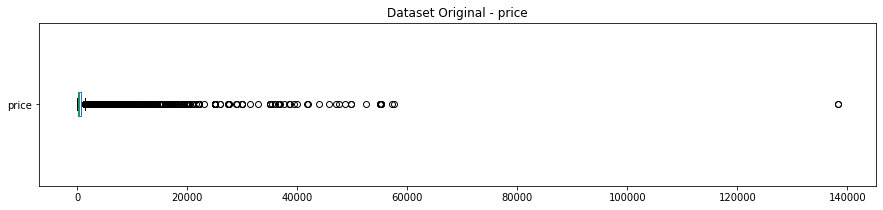

O dataset possui 35730 colunas
3796 Entradas acima de 1384
Representam 10.62% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 1384".format(len(df[df.price > 1384])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 1384]) / df.shape[0])*100))

In [ ]:
# identificando os outliers para a variável minimum_nights
q1_minimum_nights = df.minimum_nights.quantile(.25)
q3_minimum_nights = df.minimum_nights.quantile(.75)
IQR_minimum_nights = q3_minimum_nights - q1_minimum_nights
print('IQR da variável minimum_nights: ', IQR_minimum_nights)

# definindo os limites                                       
sup_minimum_nights = q3_minimum_nights + 1.5 * IQR_minimum_nights
inf_minimum_nights = q1_minimum_nights - 1.5 * IQR_minimum_nights

print('Limite superior de minimum_nights: ', sup_minimum_nights)
print('Limite inferior de minimum_nights: ', inf_minimum_nights)

IQR da variável minimum_nights:  3.0
Limite superior de minimum_nights:  8.5
Limite inferior de minimum_nights:  -3.5


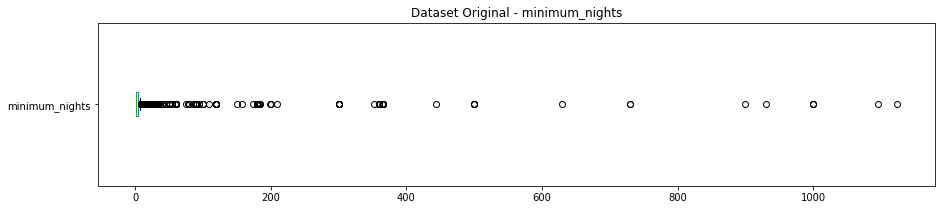

O dataset possui 35730 colunas
2823 Entradas acima de 8.5
Representam 7.9% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df.minimum_nights.plot(kind='box', vert=False);
ax.set_title('Dataset Original - minimum_nights')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 8.5".format(len(df[df.minimum_nights > 8.5])))
print("Representam {:.1f}% do dataset".format((len(df[df.minimum_nights > 8.5]) / df.shape[0])*100))

In [ ]:
# limpando o dataset
df_clean = df.copy()

df_clean.drop(df_clean[df_clean.price > 1384].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price == 0.0].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 8.5].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df.shape)
print('Shape após a limpeza: ',df_clean.shape)

Shape antes da limpeza:  (35730, 13)
Shape após a limpeza:  (29840, 13)


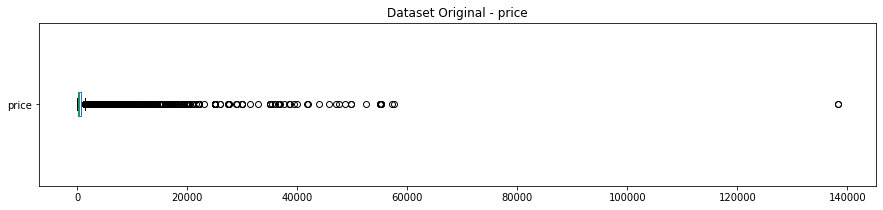

O dataset possui 35730 colunas
3796 Entradas acima de 1.384
Representam 10.62% do dataset


In [ ]:
# plotando novamente o boxplot original
fig, ax = plt.subplots(figsize=(15,3))
df.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df.shape[0]))
print("{} Entradas acima de 1.384".format(len(df[df.price > 1384])))
print("Representam {:.2f}% do dataset".format((len(df[df.price > 1384]) / df.shape[0])*100))


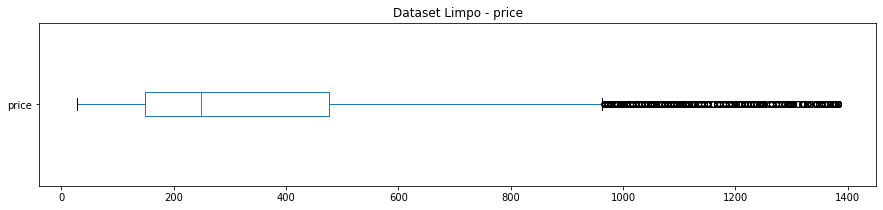

Tamanho original: 35730 colunas
Tamanho atual: 29840 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df.shape[0]))
print("Tamanho atual: {} colunas".format(df_clean.shape[0]))

Aqui podemos ver o resultado da limpeza.

O boxplot mostra alguns dados como outliers, entretanto, esses estão sendo calculados em relação ao novo dataset, e nossa limpeza levou em consideração os quartis do dado original.

Para garantirmos que não estamos lidando com outliers que vão prejudicar nossa análise, vamos checar os histogramas novamente.


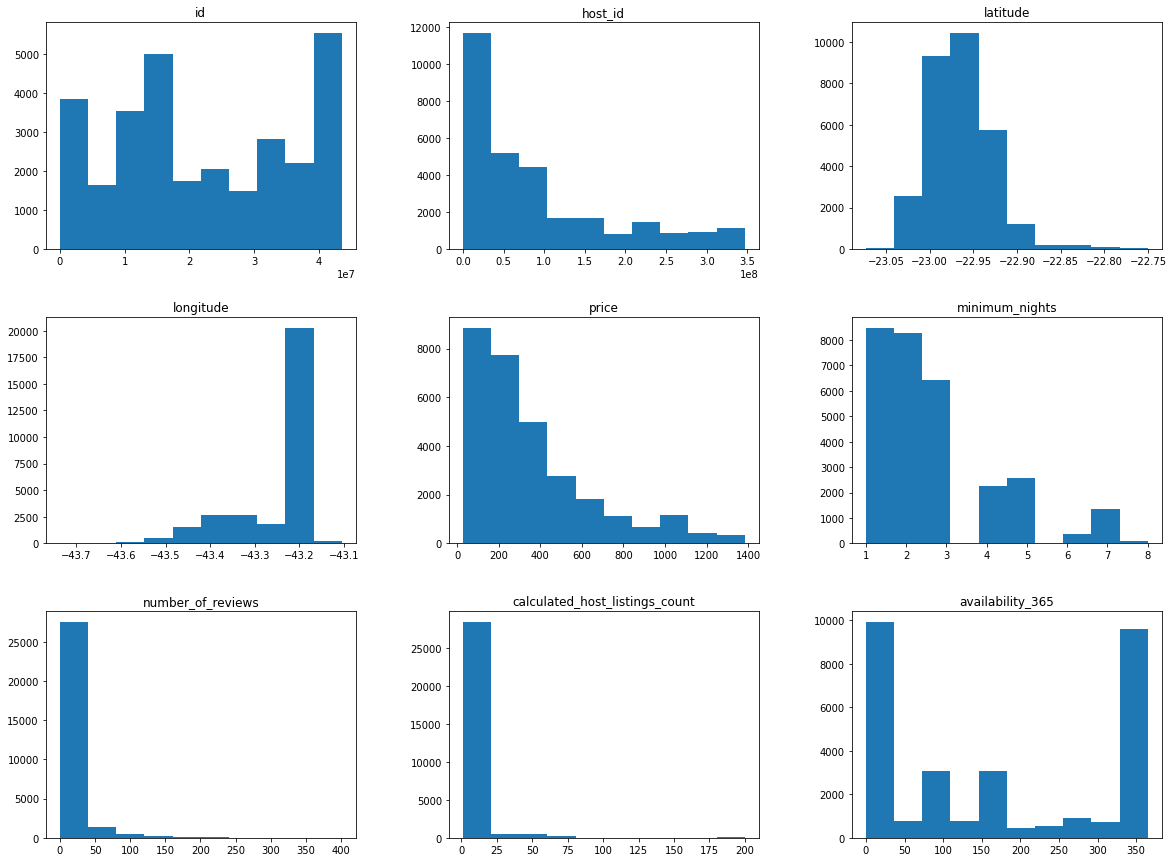

In [ ]:
# verificando as distribuições
df_clean.hist(figsize=(20,15), grid=False);

In [ ]:
# verificando a distribuição estatística dos dados limpos
df_clean[['price', 'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count', 'availability_365']].describe().round(1)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
count,29840.0,29840.0,29840.0,29840.0,29840.0
mean,353.6,2.6,11.1,5.4,172.1
std,286.2,1.6,27.4,17.5,152.5
min,28.0,1.0,0.0,1.0,0.0
25%,149.0,1.0,0.0,1.0,0.0
50%,249.0,2.0,2.0,1.0,166.0
75%,476.0,3.0,8.0,3.0,362.0
max,1383.0,8.0,401.0,200.0,365.0


Agora conseguimos ter uma ideia bem melhor da distribuição dos nossos dados.

Alguns destaques:

* A mediana da variável `price` foi pouquíssimo afetada pela limpeza dos outliers, mostrando mais uma vez a robustez desse atributo como solução para dados ausentes.
* Agora, temos dados que respeitam as regras definidas no início do notebook, onde vimos o que são bons dados.
* A média da variável `price` foi reduzida drásticamente, enfatizando a sensibilidade desse atributo em relação aos outliers.

### **4. Qual a correlação existente entre as variáveis?** <a name="subparagraph8"></a>  ([&uArr;](#sumario))

Correlação significa que existe uma relação entre duas coisas. No nosso contexto, estamos buscando relação ou semelhança entre duas variáveis.

Essa relação pode ser medida, e é função do coeficiente de correlação estabelecer qual a intensidade dela. Para identificar as correlações existentes entre as variáveis de interesse, vou:

* Criar uma matriz de correlação
* Gerar um *heatmap* a partir dessa matriz, usando a biblioteca `seaborn`

In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
price,1.000000,0.180578,-0.150263,0.055958,-0.012528
minimum_nights,0.180578,1.000000,-0.054092,0.002140,-0.040141
number_of_reviews,-0.150263,-0.054092,1.000000,-0.027394,0.051193
calculated_host_listings_count,0.055958,0.002140,-0.027394,1.000000,0.075737
availability_365,-0.012528,-0.040141,0.051193,0.075737,1.000000


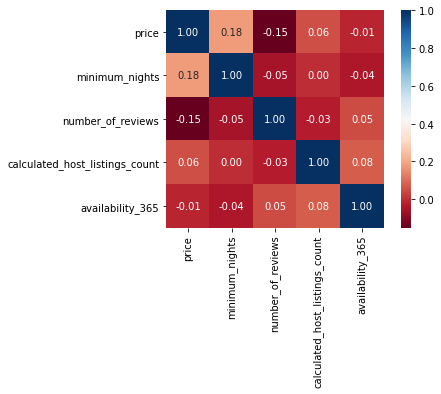

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

### **5. Qual o tipo de imóvel mais alugado no Airbnb?** <a name="subparagraph9"></a>  ([&uArr;](#sumario))

A coluna da variável `room_type` indica o tipo de locação que está anunciada no Airbnb. Se você já alugou no site, sabe que existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Vamos contar a quantidade de ocorrências de cada tipo de aluguel, usando o método `value_counts()`.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    20411
Private room        8561
Shared room          717
Hotel room           151
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
round((df_clean.room_type.value_counts() / df_clean.shape[0])*100,2)

Entire home/apt    68.40
Private room       28.69
Shared room         2.40
Hotel room          0.51
Name: room_type, dtype: float64

### **6. Qual a localidade mais cara do dataset?** <a name="subparagraph10"></a>  ([&uArr;](#sumario))

Uma maneira de se verificar uma variável em função da outra é usando `groupby()`. Neste caso, queremos comparar os bairros (*neighbourhoods*) a partir do preço de locação.



In [ ]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:15]

neighbourhood
Caju                      660.500000
Vaz Lobo                  651.500000
Ricardo de Albuquerque    610.600000
Lagoa                     499.600000
Alto da Boa Vista         487.657895
Inhoaíba                  480.000000
Deodoro                   475.500000
Leblon                    466.123759
Pedra de Guaratiba        458.500000
Riachuelo                 443.550000
Ipanema                   442.012229
Pavuna                    440.600000
Jardim Sulacap            436.666667
Barra da Tijuca           433.452153
Grumari                   429.000000
Name: price, dtype: float64

Acima, vemos que bairros como Vaz Lobo, Ricardo de Albuquerque e Deodoro, estão com média de preço superior a de lugares como Leblon e Barra da Tijuca.

Uma pessoa que não conhecesse o Rio poderia apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, veja quantas entradas há para o Vaz Lobo.

In [ ]:
# ver quantidade de imóveis no Vaz Lobo
print(df_clean[df_clean.neighbourhood == "Vaz Lobo"].shape)

# ver as 2 entradas do Complexo do Alemão
df_clean[df_clean.neighbourhood == "Vaz Lobo"]

(2, 13)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,calculated_host_listings_count,availability_365
2909,2768499,Próximo ao Maracanã,14157867,Fernando,Vaz Lobo,-22.85955,-43.32918,Private room,1001.0,1,0,1,0
33494,42012781,Casas flegler,332881900,Igor Flegler De Souza,Vaz Lobo,-22.86070,-43.32446,Private room,302.0,1,0,1,363


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se `x=longitude` e `y=latitude`.

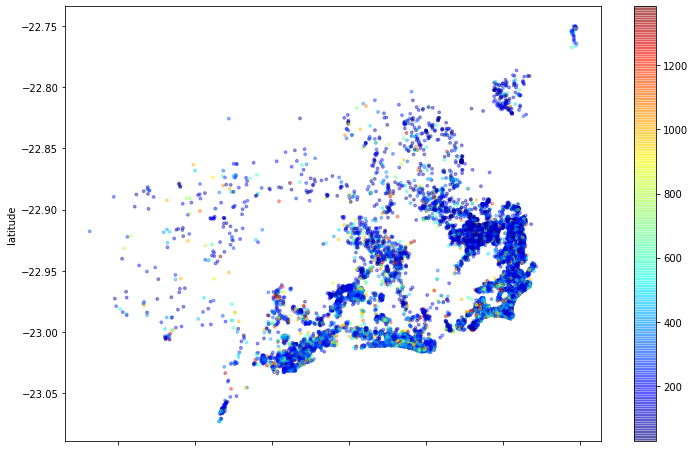

In [ ]:
# plotar os imóveis pela latitude-longitude
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8,
              cmap=plt.get_cmap('jet'), figsize=(12,8));

### **7. Houve impacto nos preços dos imóveis devido a pandemia?**  <a name="subparagraph11"></a>  ([&uArr;](#sumario))

Uma hipótese que levantei é se a situação de pandemia causada pelo `Covid-19` chegou a afetar o preço dos imóveis no período observado.

O período de observação será de **Janeiro a maio** entre os anos de **2019** e **2020**.

Como este tipo de arquivo disponibilizado pela Airbnb é por mês foi necessário importar cada um dos arquivos para seus respectivs dataframes. 




In [ ]:
# importa os arquivos 'listings.csv' dos anos de 2019 e 2020 no mesmo período para um DataFrame

#Dados de 2019
df_201901 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-01-18/visualisations/listings.csv")
df_201902 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-02-11/visualisations/listings.csv")
df_201903 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-03-13/visualisations/listings.csv")
df_201904 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-04-16/visualisations/listings.csv")
df_201905 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2019-05-21/visualisations/listings.csv")
#Dados de 2020
df_202001 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-01-21/visualisations/listings.csv")
df_202002 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-02-25/visualisations/listings.csv")
df_202003 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-03-18/visualisations/listings.csv")
df_202004 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-04-20/visualisations/listings.csv")
df_202005 = pd.read_csv("http://data.insideairbnb.com/brazil/rj/rio-de-janeiro/2020-05-24/visualisations/listings.csv")

In [ ]:
#Adiciona uma nova variável com o mês de referencia do arquivo
df_201901['mes_ref'] = '2019-01'
df_201902['mes_ref'] = '2019-02'
df_201903['mes_ref'] = '2019-03'
df_201904['mes_ref'] = '2019-04'
df_201905['mes_ref'] = '2019-05'

df_202001['mes_ref'] = '2020-01'
df_202002['mes_ref'] = '2020-02'
df_202003['mes_ref'] = '2020-03'
df_202004['mes_ref'] = '2020-04'
df_202005['mes_ref'] = '2020-05'

Após a importação uni os arquivos em um único dataframe atribuindo o seu respectivo ano mês.  

In [ ]:
#Defini lista 
df_lista = [df_201901, df_201902, df_201903, df_201904, df_201905, df_202001, df_202002, df_202003, df_202004, df_202005]

#Junta Dataframes
df_anomes = pd.concat(df_lista, ignore_index=True)

#Reordena índice de acordo com os campos 'host_id' e 'mes_ref' 
df_anomes = df_anomes.sort_values(by=['host_id','mes_ref'],ignore_index=True)

In [ ]:
#Apaga variáveis que não serão mais necessárias para a análise
df_anomes.drop(['name', 'host_name', 'neighbourhood', 'room_type', 'minimum_nights', 
                'neighbourhood_group','latitude','longitude','number_of_reviews','last_review',
                'reviews_per_month','calculated_host_listings_count', 'availability_365'], axis=1, inplace=True)

df2 = df_anomes.copy()
#df_anomes_clean.drop(df_anomes_clean[df_anomes_clean.price > 1500].index, axis=0, inplace=True)

In [ ]:
# verificando se há dados ausentes
df2.price.isnull().sum()

0

#### Limpando Outliers

In [ ]:
# verificando a distribuição estatística da variável 'price'
df2[['price']].describe()

,price
count,358524.000000
mean,672.550091
std,1841.575505
min,0.000000
25%,153.000000
50%,298.000000
75%,601.000000
max,138288.000000


Plota histograma para verificar a distribuição das variáveis. <a name="subparagraph12"></a>

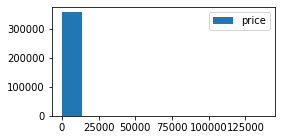

In [ ]:
# plotar o histograma para as variáveis numéricas
df2.price.hist(figsize=(4,2), grid=False, legend=True);

In [ ]:
# identificando os outliers para a variável price
q1_price = df2.price.quantile(.25)
q3_price = df2.price.quantile(.75)
IQR_price = q3_price - q1_price
print('IQR da variável price: ', IQR_price)

# definindo os limites                                       
sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Limite superior de price: ', sup_price)
print('Limite inferior de price: ', inf_price)


IQR da variável price:  448.0
Limite superior de price:  1273.0
Limite inferior de price:  -519.0


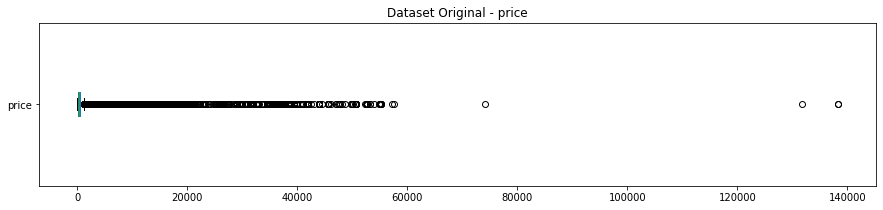

O dataset possui 358524 colunas
36094 Entradas acima de 1273
Representam 10.07% do dataset


In [ ]:
# verificando o conjunto original
fig, ax = plt.subplots(figsize=(15,3))
df2.price.plot(kind='box', vert=False);
ax.set_title('Dataset Original - price')
plt.show()
print("O dataset possui {} colunas".format(df2.shape[0]))
print("{} Entradas acima de 1273".format(len(df2[df2.price > 1273])))
print("Representam {:.2f}% do dataset".format((len(df2[df2.price > 1273]) / df2.shape[0])*100))

In [ ]:
# limpando o dataset
df2_clean = df2.copy()

df2_clean.drop(df2_clean[df2_clean.price > 1273].index, axis=0, inplace=True)
df2_clean.drop(df2_clean[df2_clean.price == 0.0].index, axis=0, inplace=True)

print('Shape antes da limpeza: ', df2.shape)
print('Shape após a limpeza: ',df2_clean.shape)

Shape antes da limpeza:  (358524, 4)
Shape após a limpeza:  (322344, 4)


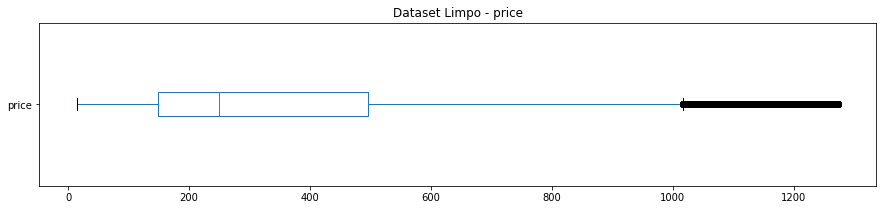

Tamanho original: 358524 colunas
Tamanho atual: 322344 colunas


In [ ]:
# verificando o conjunto limpo
fig, ax = plt.subplots(figsize=(15,3))
df2_clean.price.plot(kind='box', vert=False);
ax.set_title('Dataset Limpo - price')
plt.show()
print("Tamanho original: {} colunas".format(df2.shape[0]))
print("Tamanho atual: {} colunas".format(df2_clean.shape[0]))

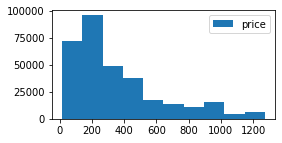

In [ ]:
# verificando a distribuição da variável 'price' após a limpeza
df2_clean.price.hist(figsize=(4,2), grid=False, legend=True);

In [ ]:
# verificando a distribuição estatística da variável 'price' após a limpeza
df2_clean[['price']].describe()

,price
count,322344.000000
mean,355.052007
std,282.277799
min,15.000000
25%,149.000000
50%,250.000000
75%,496.000000
max,1273.000000


In [ ]:
df2_clean[df2_clean['mes_ref']=='2020-05'].price.sum()

11174642

In [ ]:
df2_clean['ano'] = pd.DataFrame(df2_clean.mes_ref.str[:4])
df2_clean['mes'] = pd.to_datetime(df2_clean.mes_ref.str[5:7], format='%m').dt.month_name().str.slice(stop=3)
df2_clean['mes_n'] = pd.DataFrame(df2_clean.mes_ref.str[5:7].astype(str).astype(int))

In [ ]:
df2_clean['price_2019'] = pd.DataFrame(df2_clean[df2_clean['ano']=='2019'].price)
df2_clean['price_2020'] = pd.DataFrame(df2_clean[df2_clean['ano']=='2020'].price)

In [ ]:
df2_clean.head()

,id,host_id,price,mes_ref,ano,mes,mes_n,price_2019,price_2020
0,4855561,2616,90,2019-01,2019,Jan,1,90.0,NaN
1,4855561,2616,90,2019-02,2019,Feb,2,90.0,NaN
2,4855561,2616,92,2019-03,2019,Mar,3,92.0,NaN
3,4855561,2616,89,2019-04,2019,Apr,4,89.0,NaN
4,4855561,2616,90,2019-05,2019,May,5,90.0,NaN


In [ ]:
df2_clean.tail()

,id,host_id,price,mes_ref,ano,mes,mes_n,price_2019,price_2020
358519,43444983,346318780,340,2020-05,2020,May,5,NaN,340.0
358520,43452933,346404387,407,2020-05,2020,May,5,NaN,407.0
358521,43474463,346643851,232,2020-05,2020,May,5,NaN,232.0
358522,43487393,346801324,121,2020-05,2020,May,5,NaN,121.0
358523,43495124,346884508,448,2020-05,2020,May,5,NaN,448.0


In [ ]:
df_anomes_price = df2_clean.groupby(['mes_n','mes'])['price_2019','price_2020'].mean().sort_values(by=['mes_n'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
#df_anomes_price.drop(index='mes_n')
df_anomes_price = df_anomes_price.reset_index(level=0, drop=True)

In [ ]:
df_anomes_price

,price_2019,price_2020
mes,,
Jan,357.773948,357.525503
Feb,358.408213,354.062024
Mar,356.501700,354.246546
Apr,353.518526,351.919952
May,353.273353,353.292507


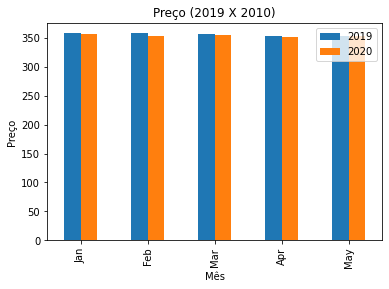

In [ ]:
df_anomes_price.plot(kind='bar')
plt.title('Preço (2019 X 2010)')
plt.xlabel('Mês')
plt.ylabel('Preço')
plt.legend(('2019', '2020'))
#plt.yticks(np.arange(369, 391, 5))
plt.show()

In [ ]:
df_percent = pd.DataFrame(((df_anomes_price.price_2020 - df_anomes_price.price_2019) / df_anomes_price.price_2019))
df_percent.rename(columns={0: '%'}, inplace = True)
df_percent

,%
mes,
Jan,-0.000694
Feb,-0.012126
Mar,-0.006326
Apr,-0.004522
May,0.000054


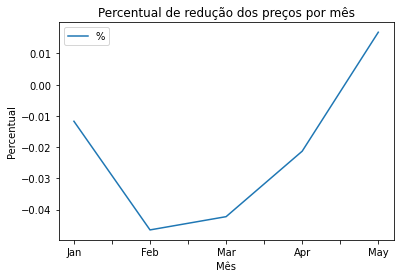

In [ ]:
df_percent.plot()
plt.title('Percentual de redução dos preços por mês')
plt.xlabel('Mês')
plt.ylabel('Percentual')
plt.show()

Observando os dois gráficos e o percentual de diferença entre os anos podemos notar que não ocorreu uma diminuição considerável dos preços como eu havia cogitado. No mês de maio, inclusive, chega a ter preços maiores em comparação com maio do ano passado.

## Conclusão <a name="paragraph3"></a>  ([&uArr;](#sumario))

Foi feita apenas uma análise superficial na base de dados do Airbnb, porém já se percebeu que existem *outliers* em algumas das variáveis. 

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

A hipótese de que os preços dos imóveis nos períodos comparados poriam ter abaixado devido a pandemia, não se confirmou.

Por fim, lembra-se que este *dataset* é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos.